In [42]:
import pandas as pd
import yfinance as yf

In [200]:
df = yf.download('ENJSA.IS', start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [201]:
buydates = pd.date_range(df.index[0], df.index[-1], freq='1M')

In [202]:
buyprices = df[df.index.isin(buydates)].Close

In [203]:
btc_amt = 500/buyprices

In [204]:
btc_amt_LS =  500*len(buyprices) / buyprices[0]

In [205]:
btc_amt_sum = btc_amt.cumsum()

In [206]:
btc_amt_sum.name = 'btc_amt_DCA'

In [207]:
df_tog = pd.concat([btc_amt_sum,df],axis=1).ffill()

In [208]:
df_tog['btc_amt_LS'] = btc_amt_LS

<AxesSubplot:xlabel='Date'>

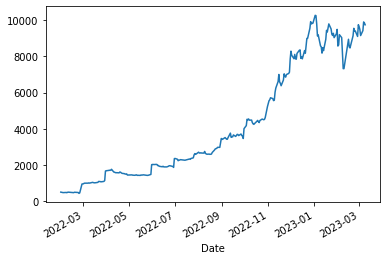

In [209]:
(df_tog.btc_amt_DCA*df_tog.Close).plot()

In [210]:
(df_tog.btc_amt_DCA*df_tog.Close)

Date
2022-01-03            NaN
2022-01-04            NaN
2022-01-05            NaN
2022-01-06            NaN
2022-01-07            NaN
                 ...     
2023-03-03    9150.674567
2023-03-06    9423.738349
2023-03-07    9903.117169
2023-03-08    9848.504297
2023-03-09    9745.346778
Length: 298, dtype: float64

In [211]:
len(buyprices)*500

5500